<a href="https://colab.research.google.com/github/seungmindavid/Machine-Learning-2023/blob/main/PCA_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [80]:
X = np.random.randint(10,50, 100).reshape(50,2)
X_meaned = X - np.mean(X, axis=0)

In [91]:
cov_mat = np.cov(X_meaned, rowvar=False)
eigen_val, eigen_vec = np.linalg.eigh(cov_mat)
sorted_index = np.argsort(eigen_val)[::-1]
sorted_eigen_value = eigen_val[sorted_index]
sorted_eigen_vectors = eigen_vec[sorted_index]
print(cov_mat)
print(np.dot(X_meaned.transpose(), X_meaned)/50)

[[121.45673469  15.88938776]
 [ 15.88938776 132.07714286]]
[[119.0276  15.5716]
 [ 15.5716 129.4356]]


In [99]:
eigenvector_subset = sorted_eigen_vectors[:,0:2]
eigenvector_subset.transpose()

array([[ 0.58439461, -0.81146962],
       [ 0.81146962,  0.58439461]])

In [103]:
def PCA(X, num_components):
  X_meaned = X - np.mean(X, axis=0)
  #cov_mat = np.cov(X_meaned, rowvar= False)
  cov_mat = np.dot(X_meaned.transpose(), X_meaned)/X_meaned.shape[0]
  eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigen_values = eigen_values[sorted_index]
  sorted_eigen_vectors = eigen_vectors[:, sorted_index]
  eigenvector = sorted_eigen_vectors[:, 0:num_components]
  X_reduced = np.dot(eigenvector.transpose(), X_meaned.transpose()).transpose()

  return X_reduced


In [100]:
import pandas as pd

#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

#prepare the data
x = data.iloc[:,0:4]

In [104]:

#prepare the target
target = data.iloc[:,4]

#Applying it to PCA function
mat_reduced = PCA(x , 2)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

#prepare the target
target = data.iloc[:,4]

#Applying it to PCA function
mat_reduced = PCA(x , 2)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)


<Axes: xlabel='PC1', ylabel='PC2'>

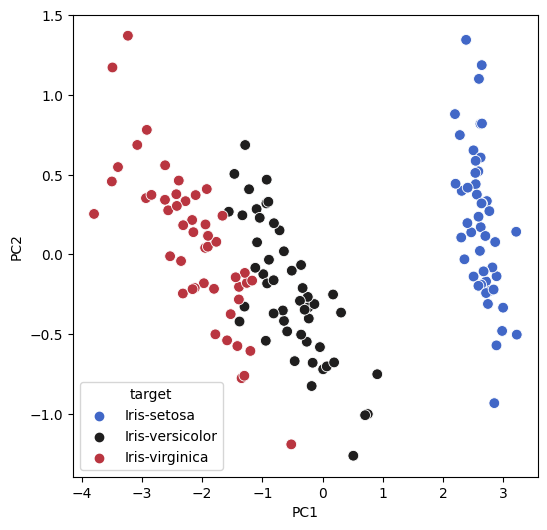

In [105]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')
